In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [170]:
df=pd.read_csv('./train_loanprediction.csv')
df_test=pd.read_csv('./test_loanprediction.csv')

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
print(df.shape)
print(df.columns)

(614, 13)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


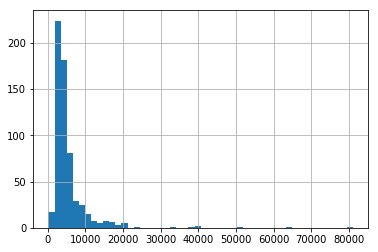

In [25]:
#analysis of numeric variables
#applicant income
df['ApplicantIncome'].hist(bins=50)

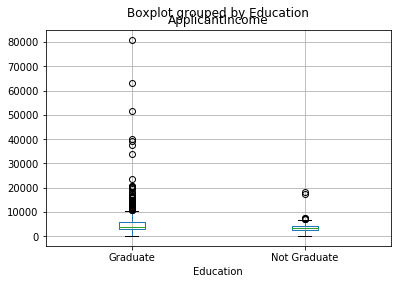

In [26]:

df.boxplot(column='ApplicantIncome',by='Education')

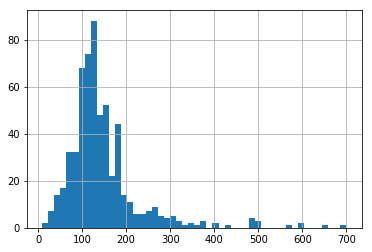

In [27]:
df['LoanAmount'].hist(bins=50)

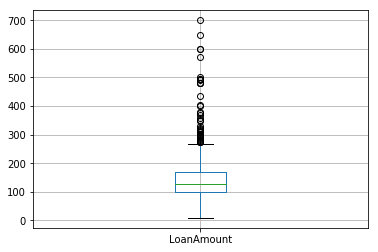

In [29]:
df.boxplot(column='LoanAmount')

data analysis

In [60]:
#List of all females who are not graduate and got a loan
df[(df['Education']=='Not Graduate') & (df['Gender']=='Female') & (df['Loan_Status']=='Y')][['Gender','Loan_Status','Education']]

,Gender,Loan_Status,Education
50,Female,Y,Not Graduate
197,Female,Y,Not Graduate
205,Female,Y,Not Graduate
279,Female,Y,Not Graduate
403,Female,Y,Not Graduate
407,Female,Y,Not Graduate
439,Female,Y,Not Graduate
463,Female,Y,Not Graduate
468,Female,Y,Not Graduate
480,Female,Y,Not Graduate


In [95]:
#finding missing values using apply
#df.isnull().sum()
def num_missing(x):
    return sum(x.isnull())
print('missing per columns')
print(df.apply(num_missing,axis=0))
print('missing per row')
df.apply(num_missing,axis=1).head()

missing per columns
Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
missing per row


0    1
1    0
2    0
3    0
4    0
dtype: int64

In [88]:
#imputing gender,married and self employed with mode
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [91]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [97]:
#pivot table
impute_grps=df.pivot_table(values=['LoanAmount'],index=['Gender','Married','Self_Employed'],aggfunc=np.mean)
print(impute_grps)

                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833


In [120]:
#iterating to replace missing loan amount
for i,row in df.loc[df['LoanAmount'].isnull(),:].iterrows():
    ind=tuple([row['Gender'],row['Married'],row['Self_Employed']])
    df.loc[i,'LoanAmount']=impute_grps.loc[ind].values[0]
df['LoanAmount'].isnull().sum()

0

In [121]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [136]:
#does credit history affect loan status
def Percen(row):
    return row/row[-1]
print(pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True))
print(pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True).apply(Percen,axis=1))

Loan_Status       N    Y  All
Credit_History               
0.0              82    7   89
1.0              97  378  475
All             179  385  564
Loan_Status            N         Y  All
Credit_History                         
0.0             0.921348  0.078652  1.0
1.0             0.204211  0.795789  1.0
All             0.317376  0.682624  1.0


In [152]:
#data merging
prop_rates = pd.DataFrame([1000, 5000, 12000], index=['Rural','Semiurban','Urban'],columns=['rates'])
data_merged=df.merge(prop_rates,how='inner',left_on='Property_Area',right_index=True)
data_merged.pivot_table(values='Credit_History',index=['Property_Area','rates'],aggfunc=len)

,,Credit_History
Property_Area,rates,
Rural,1000,179.0
Semiurban,5000,233.0
Urban,12000,202.0


In [157]:
#sorting df
data_sorted=df.sort_values(by=['ApplicantIncome','CoapplicantIncome'],ascending=False)
data_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
409,81000,0.0
333,63337,0.0
171,51763,0.0
155,39999,0.0
185,39147,4750.0
443,37719,0.0
183,33846,0.0
126,23803,0.0
506,20833,6667.0
284,20667,0.0


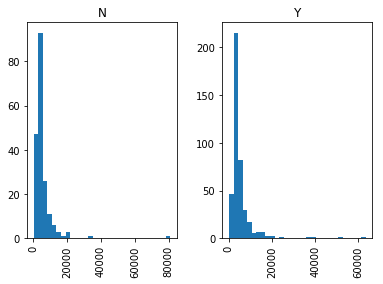

In [162]:
#multiple histogram
df.hist(column='ApplicantIncome',by='Loan_Status',bins=30);

In [168]:
#binning
pd.cut(df['LoanAmount'],bins=[df['LoanAmount'].min(),90,140,190,df['LoanAmount'].max()],labels=['Low','medium','high','very high']).value_counts()

medium       273
high         146
Low          103
very high     91
Name: LoanAmount, dtype: int64

In [179]:
print(df.dtypes)
print(df.dtypes.reset_index().groupby(0).count())
print(df.shape,df_test.shape)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
         index
0             
int64        1
float64      4
object       8
(614, 13) (367, 12)
